# Exercises sheet 1 - Training with vector data

### 28.09.2023

In [1]:
import os
import geopandas as gpd
import pandas as pd
from pyproj import CRS
import matplotlib.pyplot as plt

## Exercise 1 | data in f1ex1 | create a feature class with the contour lines of the municipality of Coimbra.


In [16]:
folder_path = 'f1ex1'

contour_lines = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.shp') and file.startswith('c')]
coimbra = 'f1ex1/limites_coimbra.shp'

df_coimbra = gpd.read_file(coimbra)
df_coimbra = df_coimbra.to_crs(CRS('ESRI:102164'))
print(f'Projection of Coimbra limites layer: {df_coimbra.crs}')
target_crs = CRS('ESRI:102164')

gdfs = []
print('Projections of contour lines files:')
for el in contour_lines:
    gdf = gpd.read_file(el)
    print(el)
    print(gdf.crs)
    gdf.crs = target_crs
    print(gdf.crs)
    gdfs.append(gdf)
    print('----------------')

Projection of Coimbra limites layer: ESRI:102164
Projections of contour lines files:
f1ex1\c218alt_10.shp
None
ESRI:102164
----------------
f1ex1\c219alt_10.shp
None
ESRI:102164
----------------
f1ex1\c229alt_10.shp
None
ESRI:102164
----------------
f1ex1\c230alt_10.shp
None
ESRI:102164
----------------
f1ex1\c231alt_10.shp
None
ESRI:102164
----------------
f1ex1\c240alt_10.shp
None
ESRI:102164
----------------
f1ex1\c241alt_10.shp
None
ESRI:102164
----------------
f1ex1\c242alt_10.shp
None
ESRI:102164
----------------
f1ex1\c251alt_10.shp
None
ESRI:102164
----------------


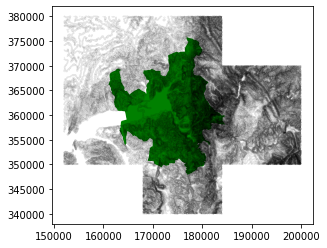

In [17]:
ax = df_coimbra.plot(color='green')

for gdf in gdfs:
    gdf.plot(ax=ax, color='black', alpha=0.1)

plt.show()

<AxesSubplot: >

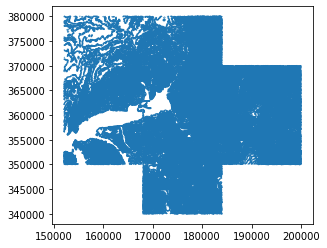

In [18]:
union_set = gpd.GeoDataFrame()

for gdf in gdfs:
    union_set = gpd.GeoDataFrame(pd.concat([union_set, gdf], ignore_index=True), crs=gdf.crs)

union_set.plot()

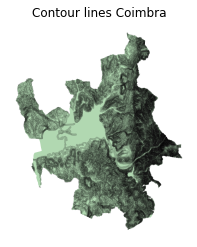

In [19]:
clipped_lines = union_set.clip(df_coimbra)

ax = df_coimbra.plot(color='green', alpha=0.3)
clipped_lines.plot(ax=ax, color='black', alpha=0.2)
plt.axis('off')
plt.title('Contour lines Coimbra')
plt.show()

## Exercise 2 | data in f1ex2 | calculate the number of hectares that transitioned from agriculture in 2007 to become Artificialized Territory in 2018.


<AxesSubplot: >

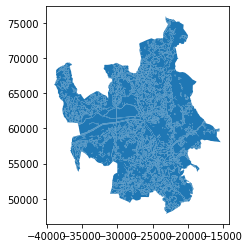

In [20]:
area2007 = r'f1ex2/cmb_cos07.shp'
area2018 = r'f1ex2/cmb_cos18.shp'

df2007 = gpd.read_file(area2007)
df2018 = gpd.read_file(area2018)

df2007.plot()

In [22]:
# print(df2007.head()) # display head of attribute table
# print(df2007.columns) 
print(df2007.COS07n1_L.head())
pd.unique(df2007.COS07n1_L)

0    Territórios artificializados
1    Territórios artificializados
2    Territórios artificializados
3    Territórios artificializados
4    Territórios artificializados
Name: COS07n1_L, dtype: object


array(['Territórios artificializados', 'Agricultura', 'Pastagens',
       'Florestas', 'Matos', 'Espaços descobertos ou com pouca vegetação',
       'Zonas húmidas', 'Massas de água superficiais'], dtype=object)

<AxesSubplot: >

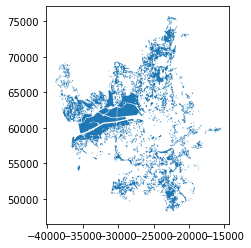

In [23]:
# filter
df2007_agr = df2007[df2007.COS07n1_L == 'Agricultura']
df2007_agr.plot()

<AxesSubplot: >

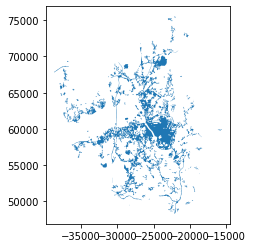

In [24]:
df2018_terr_art = df2018[df2018.COS18n1_L == 'Territórios artificializados']
df2018_terr_art.plot()

Result: 91.34 ha


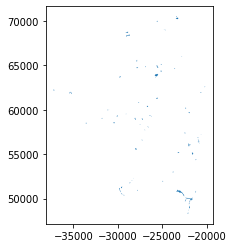

In [26]:
common_polygons = gpd.overlay(df2007_agr, df2018_terr_art, how='intersection', keep_geom_type=True)
total_area_hectares = sum(common_polygons['geometry'].area / 10000)

common_polygons.plot()

print(f"Result: {round(total_area_hectares, 2)} ha")

## Exercise 3 | data in f1ex3 | determine the municipal boundaries in the Coimbra Region based on the “Freguesias” boundaries (“Freguesias” are sub-units of the municipalities in Portugal).


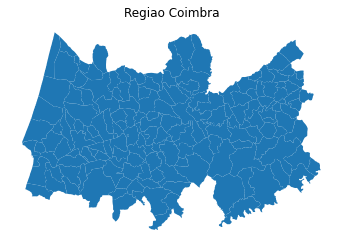

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   DICOFRE     168 non-null    object  
 1   Freguesia   168 non-null    object  
 2   Concelho    168 non-null    object  
 3   Distrito    168 non-null    object  
 4   Area_ha     168 non-null    float64 
 5   Des_Simpli  168 non-null    object  
 6   geometry    168 non-null    geometry
dtypes: float64(1), geometry(1), object(5)
memory usage: 9.3+ KB


In [32]:
freg = gpd.read_file('f1ex3/freg_regiao_coimbra.shp')

freg.plot()
plt.title('Regiao Coimbra')
plt.axis('off')
plt.show()

freg.info()

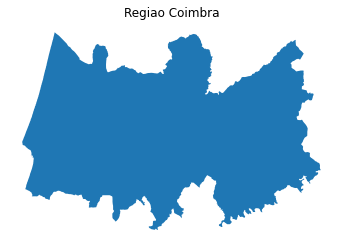

In [37]:
union_coimbra = freg.unary_union

# Convert to geodataframe
union_coimbra_gdf = gpd.GeoDataFrame(geometry=[union_coimbra])

union_coimbra_gdf.plot()
plt.title('Coimbra Region')
plt.axis('off')
plt.show()

## Exercise 4 | data in f1ex4 | compute the number of pharmacies per 10 000 inhabitants in each “Freguesia” of Coimbra.


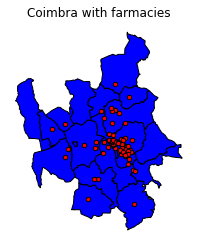

In [52]:
farmacias = gpd.read_file('f1ex4/farmacias_e_para.shp')
freg_cmb = gpd.read_file('f1ex4/freg_cmb.shp')

ax = freg_cmb.plot(color='blue', edgecolor='black')
farmacias.plot(ax=ax, color='red', edgecolor='black', markersize=20)

plt.title('Coimbra with farmacies')
plt.axis('off')
plt.show()

In [56]:
joined_data = gpd.sjoin(farmacias, freg_cmb, how='left', predicate='within')

farmacias_in_freg = joined_data.groupby('Freguesia').size().reset_index(name='farmacies')
freg_coimbra_with_farmacias = freg_cmb.set_index('Freguesia').join(farmacias_in_freg.set_index('Freguesia'))

freg_coimbra_with_farmacias

,Des_Simpli,idconc,idfreg,popres11,geometry,farmacies
Freguesia,,,,,,
Almalaguês,Almalaguês,0603,060301,3111,"POLYGON ((-20725.391 54329.725, -20725.501 543...",1.0
Brasfemes,Brasfemes,0603,060309,1969,"POLYGON ((-20373.719 67919.039, -20371.189 679...",1.0
Ceira,Ceira,0603,060311,3701,"POLYGON ((-15310.581 58040.966, -15517.961 580...",1.0
Cernache,Cernache,0603,060312,4048,"POLYGON ((-25425.752 50852.985, -25426.372 508...",1.0
Santo António dos Olivais,Santo António dos Olivais,0603,060318,38936,"POLYGON ((-20630.040 62210.340, -20630.831 622...",19.0
São João do Campo,São João do Campo,0603,060320,2073,"POLYGON ((-30747.845 62907.662, -30742.494 628...",1.0
São Silvestre,São Silvestre,0603,060324,3122,"POLYGON ((-34722.973 64155.281, -34706.203 641...",1.0
Torres do Mondego,Torres do Mondego,0603,060329,2402,"POLYGON ((-17637.484 61128.630, -17604.283 610...",NaN
União das freguesias de Antuzede e Vil de Matos,Antuzede e Vil de Matos,0603,060332,3146,"POLYGON ((-28119.941 67978.243, -28113.110 679...",NaN


In [35]:
freg_coimbra_with_farmacias['result'] = (freg_coimbra_with_farmacias['farmacies'] / freg_coimbra_with_farmacias['popres11']) * 10000

freg_coimbra_with_farmacias['result']

Freguesia
Almalaguês                                                                           3.214401
Brasfemes                                                                            5.078720
Ceira                                                                                2.701972
Cernache                                                                             2.470356
Santo António dos Olivais                                                            4.879803
São João do Campo                                                                    4.823927
São Silvestre                                                                        3.203075
Torres do Mondego                                                                         NaN
União das freguesias de Antuzede e Vil de Matos                                           NaN
União das freguesias de Assafarge e Antanhol                                         3.772161
União das freguesias de Coimbra (Sé Nova, Santa Cr

## Exercise 5 | data in f1ex5 | calculate the urban green space area per inhabitant (m2/inhabitant). 

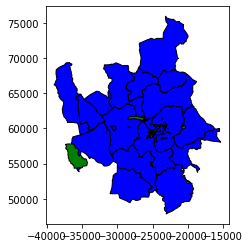

In [11]:
urban_green_space = gpd.read_file('f1ex5/espacos_verdes.shp')
freg_cmb = gpd.read_file('f1ex5/freg_cmb.shp')

ax = freg_cmb.plot(color='blue', edgecolor='black')
urban_green_space.plot(ax=ax, color='green', edgecolor='black')
plt.show()

In [12]:
freg_cmb.set_index('Freguesia', inplace=True)

In [20]:
urban_green_space_clipped = gpd.sjoin(freg_cmb, urban_green_space, how='right', predicate='intersects')
urban_green_space_clipped

,index_left,Des_Simpli,idconc,idfreg,popres11,Id,geometry
0,"União das freguesias de Taveiro, Ameal e Arzila","Taveiro, Ameal e Arzila",0603,060340,4285,0,"POLYGON ((-36300.929 57807.993, -36298.409 577..."
1,Santo António dos Olivais,Santo António dos Olivais,0603,060318,38936,0,"POLYGON ((-23679.862 58607.914, -23661.887 585..."
2,Santo António dos Olivais,Santo António dos Olivais,0603,060318,38936,0,"POLYGON ((-22961.245 58706.742, -22961.155 587..."
3,União das freguesias de São Martinho do Bispo ...,São Martinho do Bispo e Ribeira de Frades,0603,060338,16049,0,"POLYGON ((-27245.231 58717.636, -27247.518 586..."
4,União das freguesias de Santa Clara e Castelo ...,Santa Clara e Castelo Viegas,0603,060336,11624,0,"POLYGON ((-25497.676 59036.658, -25454.631 589..."
5,Santo António dos Olivais,Santo António dos Olivais,0603,060318,38936,0,"POLYGON ((-23307.634 59296.893, -23294.724 592..."
6,Santo António dos Olivais,Santo António dos Olivais,0603,060318,38936,0,"POLYGON ((-22419.438 59329.194, -22419.241 593..."
7,"União das freguesias de Taveiro, Ameal e Arzila","Taveiro, Ameal e Arzila",0603,060340,4285,0,"POLYGON ((-31528.182 59390.292, -31568.888 593..."
8,Santo António dos Olivais,Santo António dos Olivais,0603,060318,38936,0,"POLYGON ((-22911.986 59501.033, -22911.915 595..."
9,União das freguesias de Santa Clara e Castelo ...,Santa Clara e Castelo Viegas,0603,060336,11624,0,"POLYGON ((-25429.878 59449.542, -25415.420 594..."


In [32]:
urban_green_space_clipped['area_m2'] = urban_green_space_clipped['geometry'].area
freg_cmb['area_green'] = urban_green_space_clipped.groupby('index_left')['area_m2'].sum()

freg_cmb['green_per_person'] = freg_cmb['area_green']/freg_cmb['popres11']
freg_cmb.green_per_person

Freguesia
União das freguesias de Souselas e Botão                                                    NaN
Cernache                                                                                    NaN
Almalaguês                                                                                  NaN
União das freguesias de Assafarge e Antanhol                                                NaN
Ceira                                                                                       NaN
União das freguesias de Taveiro, Ameal e Arzila                                     1370.263849
União das freguesias de Taveiro, Ameal e Arzila                                     1370.263849
União das freguesias de Santa Clara e Castelo Viegas                                  26.070059
Santo António dos Olivais                                                              9.509354
Torres do Mondego                                                                     82.795068
União das freguesias de São Ma

## Exercise 6 | data in f1ex6 | determine the population density of each “Freguesia” of the municipality of Coimbra.

In [110]:
bgri = gpd.read_file('f1ex6/bgri_coimbra.shp')
freg = gpd.read_file('f1ex6/freg_coimbra.shp')

merged_data = bgri.merge(freg, left_on='idfreg', right_on='DICOFRE', how='inner')
merged_data

,idfreg,bgri21,popres21,geometry_x,DICOFRE,Freguesia,Concelho,Distrito,Area_ha,Des_Simpli,geometry_y
0,060318,06031802203,38,"POLYGON ((-23372.399 57505.522, -23370.432 575...",060318,Santo António dos Olivais,Coimbra,Coimbra,1927.33,Santo António dos Olivais,"POLYGON ((-20630.040 62210.340, -20630.831 622..."
1,060318,06031803002,25,"POLYGON ((-23187.945 57971.750, -23200.384 579...",060318,Santo António dos Olivais,Coimbra,Coimbra,1927.33,Santo António dos Olivais,"POLYGON ((-20630.040 62210.340, -20630.831 622..."
2,060318,06031802209,5,"POLYGON ((-21756.876 57982.049, -21902.022 578...",060318,Santo António dos Olivais,Coimbra,Coimbra,1927.33,Santo António dos Olivais,"POLYGON ((-20630.040 62210.340, -20630.831 622..."
3,060318,06031802801,217,"POLYGON ((-24132.777 58019.972, -24170.084 580...",060318,Santo António dos Olivais,Coimbra,Coimbra,1927.33,Santo António dos Olivais,"POLYGON ((-20630.040 62210.340, -20630.831 622..."
4,060318,06031802911,8,"POLYGON ((-24479.488 58098.493, -24482.717 580...",060318,Santo António dos Olivais,Coimbra,Coimbra,1927.33,Santo António dos Olivais,"POLYGON ((-20630.040 62210.340, -20630.831 622..."
...,...,...,...,...,...,...,...,...,...,...,...
1843,060320,06032000207,9,"POLYGON ((-31913.486 63174.152, -31907.264 631...",060320,São João do Campo,Coimbra,Coimbra,791.95,São João do Campo,"POLYGON ((-30747.845 62907.662, -30742.494 628..."
1844,060320,06032000203,34,"POLYGON ((-31773.395 62994.200, -31772.357 629...",060320,São João do Campo,Coimbra,Coimbra,791.95,São João do Campo,"POLYGON ((-30747.845 62907.662, -30742.494 628..."
1845,060320,06032000111,20,"POLYGON ((-32187.404 63682.234, -32217.508 636...",060320,São João do Campo,Coimbra,Coimbra,791.95,São João do Campo,"POLYGON ((-30747.845 62907.662, -30742.494 628..."
1846,060320,06032000116,72,"POLYGON ((-32325.317 64028.198, -32323.007 640...",060320,São João do Campo,Coimbra,Coimbra,791.95,São João do Campo,"POLYGON ((-30747.845 62907.662, -30742.494 628..."


In [111]:
merged_data['population_density'] = merged_data['popres21'] / merged_data['Area_ha']

density_result = merged_data[['Freguesia', 'population_density']].groupby('Freguesia').sum()
density_result

,population_density
Freguesia,
Almalaguês,1.231658
Brasfemes,2.105057
Ceira,2.610886
Cernache,2.067289
Santo António dos Olivais,21.350781
São João do Campo,2.304438
São Silvestre,2.719645
Torres do Mondego,1.220676
União das freguesias de Antuzede e Vil de Matos,1.612583


## Exercise 7 | data in f1ex7 | Calculate the percentage of individuals living within 500 meters of a recycling bin in each “Freguesia” of Coimbra.

epsg:3763 epsg:3763 epsg:4326
epsg:3763 epsg:3763 EPSG:3763


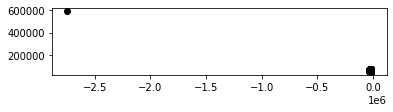

In [110]:
bgri = gpd.read_file('f1ex7/bgri_coimbra.shp')
freg = gpd.read_file('f1ex7/freg_coimbra.shp')
recycling_bins = gpd.read_file('f1ex7/ecopontos19.shp')
print(bgri.crs, freg.crs, recycling_bins.crs)
target_crs = CRS('EPSG:3763')
recycling_bins = recycling_bins.to_crs(target_crs)
print(bgri.crs, freg.crs, recycling_bins.crs)

ax = freg.plot(color='blue', edgecolor='black')
recycling_bins.plot(ax=ax, color='black', edgecolor='black')
plt.show()

In [111]:
# one outlier point to delete
recycling_bins.describe().T

,count,mean,std,min,25%,50%,75%,max
lat,761.0,40.210907,0.033895,40.107897,40.194850,40.206533,40.229772,40.330922
lng,761.0,-8.477300,1.153581,-40.237808,-8.454708,-8.427300,-8.406153,-8.320764


In [112]:
recycling_bins = recycling_bins[recycling_bins['lng'] != recycling_bins['lng'].min()]
recycling_bins.describe().T

,count,mean,std,min,25%,50%,75%,max
lat,760.0,40.210871,0.033903,40.107897,40.194822,40.206521,40.229685,40.330922
lng,760.0,-8.435510,0.041578,-8.576292,-8.454629,-8.427104,-8.406147,-8.320764


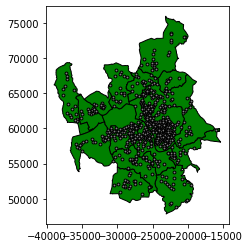

In [113]:
ax = freg.plot(color='green', edgecolor='black')
recycling_bins.plot(ax=ax, color='grey', edgecolor='black', markersize=8)
plt.show()

<AxesSubplot: >

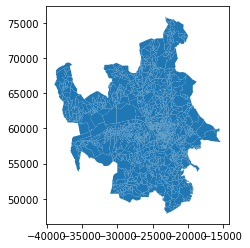

In [114]:
merged_data = bgri.merge(freg, left_on='idfreg', right_on='DICOFRE', how='inner')
merged_data_gdf = gpd.GeoDataFrame(merged_data, geometry='geometry_x')
merged_data_gdf.plot()

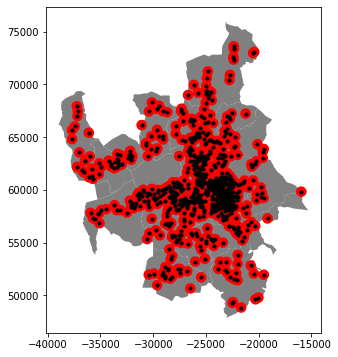

In [115]:
recycling_bins_buffer = recycling_bins.copy()
recycling_bins_buffer['geometry'] = recycling_bins['geometry'].buffer(500)

fig, ax = plt.subplots(figsize=(8, 6))
freg.plot(ax=ax, color='grey')
recycling_bins_buffer.plot(ax=ax, color='red')
recycling_bins.plot(ax=ax, color='black', markersize=10)
plt.show()

In [116]:
# to prevent the population from being counted several times within one buffer
recycling_bins_buffer = recycling_bins_buffer.unary_union
intersect  = gpd.overlay(merged_data_gdf, gpd.GeoDataFrame(geometry=[recycling_bins_buffer], crs=target_crs), how='intersection')

population_within_buffer = intersect.groupby('Freguesia')['popres21'].sum().reset_index()

population_within_buffer

,Freguesia,popres21
0,Almalaguês,2714
1,Brasfemes,1919
2,Ceira,3108
3,Cernache,3962
4,Santo António dos Olivais,41150
5,São João do Campo,1825
6,São Silvestre,2794
7,Torres do Mondego,2034
8,União das freguesias de Antuzede e Vil de Matos,2842
9,União das freguesias de Assafarge e Antanhol,4993


In [106]:
total_population = merged_data_gdf.groupby('Freguesia')['popres21'].sum().reset_index()
total_population

,Freguesia,popres21
0,Almalaguês,2853
1,Brasfemes,1932
2,Ceira,3244
3,Cernache,3962
4,Santo António dos Olivais,41150
5,São João do Campo,1825
6,São Silvestre,2794
7,Torres do Mondego,2034
8,União das freguesias de Antuzede e Vil de Matos,2842
9,União das freguesias de Assafarge e Antanhol,4993


In [127]:
result = pd.merge(population_within_buffer, total_population, on='Freguesia').set_index('Freguesia')
result.columns = ['pop_in_buffors', 'total_pop']
result['percentage_within_500m'] = result['pop_in_buffors'] / result['total_pop'] * 100

print(f"The percentage of individuals living within 500 meters of a recycling bin per Freguesia: {round(result['percentage_within_500m'], 2)}")

The percentage of individuals living within 500 meters of a recycling bin per Freguesia: Freguesia
Almalaguês                                                                           95.13
Brasfemes                                                                            99.33
Ceira                                                                                95.81
Cernache                                                                            100.00
Santo António dos Olivais                                                           100.00
São João do Campo                                                                   100.00
São Silvestre                                                                       100.00
Torres do Mondego                                                                   100.00
União das freguesias de Antuzede e Vil de Matos                                     100.00
União das freguesias de Assafarge e Antanhol                                      

## Exercise 8 | data in f1ex8 | determine the percentage of inhabited area within each Freguesia of Coimbra.


<AxesSubplot: >

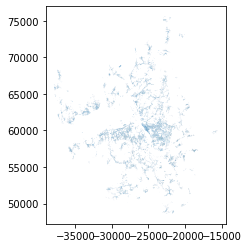

In [23]:
areas = gpd.read_file('f1ex8/areas_habitadas.shp')
freg = gpd.read_file('f1ex8/freg_coimbra.shp')
areas.plot()

<AxesSubplot: >

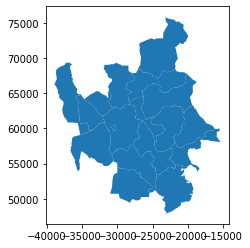

In [24]:
freg.plot()

In [29]:
freg['Area_m2_freg'] = freg['Area_ha'] * 10000
freg

,DICOFRE,Concelho,Distrito,Area_ha,Des_Simpli,geometry,inhab,Area_m2_freg
Freguesia,,,,,,,,
Almalaguês,060301,Coimbra,Coimbra,2316.39,Almalaguês,"POLYGON ((-20725.391 54329.725, -20725.501 543...",3.715669e+05,23163900.0
Brasfemes,060309,Coimbra,Coimbra,917.79,Brasfemes,"POLYGON ((-20373.719 67919.039, -20371.189 679...",1.478630e+05,9177900.0
Ceira,060311,Coimbra,Coimbra,1242.49,Ceira,"POLYGON ((-15310.581 58040.966, -15517.960 580...",3.145096e+05,12424900.0
Cernache,060312,Coimbra,Coimbra,1916.52,Cernache,"POLYGON ((-25425.752 50852.985, -25426.372 508...",3.976421e+05,19165200.0
Santo António dos Olivais,060318,Coimbra,Coimbra,1927.33,Santo António dos Olivais,"POLYGON ((-20630.040 62210.340, -20630.831 622...",1.388657e+06,19273300.0
São João do Campo,060320,Coimbra,Coimbra,791.95,São João do Campo,"POLYGON ((-30747.845 62907.662, -30742.494 628...",2.139542e+05,7919500.0
São Silvestre,060324,Coimbra,Coimbra,1027.34,São Silvestre,"POLYGON ((-34722.973 64155.281, -34706.203 641...",2.683439e+05,10273400.0
Torres do Mondego,060329,Coimbra,Coimbra,1666.29,Torres do Mondego,"POLYGON ((-17637.484 61128.630, -17604.283 610...",1.855627e+05,16662900.0
União das freguesias de Antuzede e Vil de Matos,060332,Coimbra,Coimbra,1762.39,Antuzede e Vil de Matos,"POLYGON ((-28119.941 67978.243, -28113.110 679...",3.390131e+05,17623900.0


In [30]:
areas['Area_m2_inh'] = areas['geometry'].area
areas

,bgri,Shape_Leng,Shape_Area,geometry,Area_m2_inh
0,06030100101,66.888951,200.710630,"POLYGON ((-22421.586 48587.280, -22412.616 485...",200.710630
1,06030100101,63.850404,230.239119,"POLYGON ((-22571.852 48617.500, -22592.758 486...",230.239119
2,06030100101,53.180390,171.703745,"POLYGON ((-22625.424 48638.042, -22625.598 486...",171.703745
3,06030100101,87.448168,300.599742,"POLYGON ((-22505.656 48660.287, -22487.331 486...",300.599742
4,06030100101,47.990497,142.568602,"POLYGON ((-22554.845 48674.914, -22558.303 486...",142.568602
...,...,...,...,...,...
35563,06034100318,157.072073,604.524678,"POLYGON ((-25440.149 67808.125, -25437.006 678...",604.524678
35564,06034100318,40.429065,82.410065,"POLYGON ((-25506.089 67806.956, -25521.061 678...",82.410065
35565,06034100318,59.188680,171.844124,"POLYGON ((-25523.519 67802.801, -25545.359 678...",171.844124
35566,06034100318,52.012083,168.390997,"POLYGON ((-25515.375 67835.193, -25516.680 678...",168.390997


In [26]:
result = gpd.sjoin(areas, freg, how='left', predicate='intersects')
result

,bgri,Shape_Leng,Shape_Area,geometry,Area_m2_inh,index_right,DICOFRE,Freguesia,Concelho,Distrito,Area_ha,Des_Simpli
0,06030100101,66.888951,200.710630,"POLYGON ((-22421.586 48587.280, -22412.616 485...",200.710630,0,060301,Almalaguês,Coimbra,Coimbra,2316.39,Almalaguês
1,06030100101,63.850404,230.239119,"POLYGON ((-22571.852 48617.500, -22592.758 486...",230.239119,0,060301,Almalaguês,Coimbra,Coimbra,2316.39,Almalaguês
2,06030100101,53.180390,171.703745,"POLYGON ((-22625.424 48638.042, -22625.598 486...",171.703745,0,060301,Almalaguês,Coimbra,Coimbra,2316.39,Almalaguês
3,06030100101,87.448168,300.599742,"POLYGON ((-22505.656 48660.287, -22487.331 486...",300.599742,0,060301,Almalaguês,Coimbra,Coimbra,2316.39,Almalaguês
4,06030100101,47.990497,142.568602,"POLYGON ((-22554.845 48674.914, -22558.303 486...",142.568602,0,060301,Almalaguês,Coimbra,Coimbra,2316.39,Almalaguês
...,...,...,...,...,...,...,...,...,...,...,...,...
35563,06034100318,157.072073,604.524678,"POLYGON ((-25440.149 67808.125, -25437.006 678...",604.524678,17,060341,União das freguesias de Trouxemil e Torre de V...,Coimbra,Coimbra,1055.78,Trouxemil e Torre de Vilela
35564,06034100318,40.429065,82.410065,"POLYGON ((-25506.089 67806.956, -25521.061 678...",82.410065,17,060341,União das freguesias de Trouxemil e Torre de V...,Coimbra,Coimbra,1055.78,Trouxemil e Torre de Vilela
35565,06034100318,59.188680,171.844124,"POLYGON ((-25523.519 67802.801, -25545.359 678...",171.844124,17,060341,União das freguesias de Trouxemil e Torre de V...,Coimbra,Coimbra,1055.78,Trouxemil e Torre de Vilela
35566,06034100318,52.012083,168.390997,"POLYGON ((-25515.375 67835.193, -25516.680 678...",168.390997,17,060341,União das freguesias de Trouxemil e Torre de V...,Coimbra,Coimbra,1055.78,Trouxemil e Torre de Vilela


In [27]:
new = result.groupby('Freguesia')['Area_m2_inh'].sum()
freg.set_index('Freguesia', inplace=True)

In [31]:
freg['inhab'] = new
freg['percentage'] = freg['inhab']*100/freg['Area_m2_freg']
freg['percentage']

Freguesia
Almalaguês                                                                           1.604077
Brasfemes                                                                            1.611077
Ceira                                                                                2.531285
Cernache                                                                             2.074813
Santo António dos Olivais                                                            7.205082
São João do Campo                                                                    2.701612
São Silvestre                                                                        2.612027
Torres do Mondego                                                                    1.113628
União das freguesias de Antuzede e Vil de Matos                                      1.923599
União das freguesias de Assafarge e Antanhol                                         2.413503
União das freguesias de Coimbra (Sé Nova, Santa Cr

## Exercise 9 | data in f1ex9 | update the Land Use and Land Cover Map of 2018 (COS 2018) by adding information on areas affected by fires from 2019 to the present. Replace the class in the COS 2018 with the “Burned Areas” class in regions affected by fires since 2019.

<AxesSubplot: >

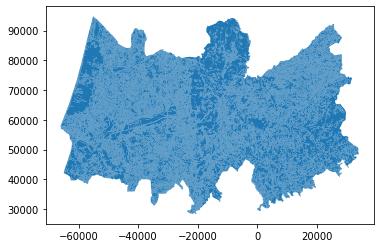

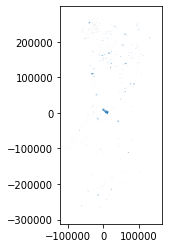

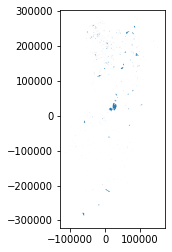

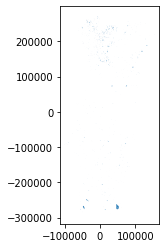

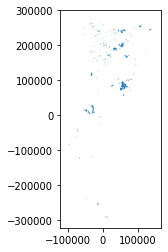

In [21]:
cos2018 = gpd.read_file('f1ex9/cos2018.shp')
aa19 = gpd.read_file('f1ex9/aa_2019.shp')
aa20 = gpd.read_file('f1ex9/aa_2020.shp')
aa21 = gpd.read_file('f1ex9/aa_2021.shp')
aa22 = gpd.read_file('f1ex9/ardida_2022.shp')
cos2018.plot()
aa19.plot()
aa20.plot()
aa21.plot()
aa22.plot()

<AxesSubplot: >

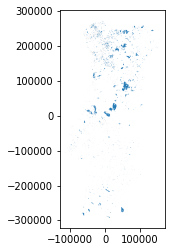

In [22]:
burns = gpd.GeoDataFrame(pd.concat([aa19, aa20, aa21, aa22], ignore_index=True))
burns.plot()

<Axes: >

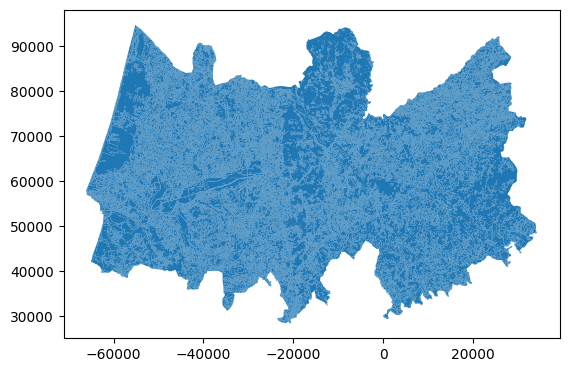

In [117]:
intersection_result = gpd.overlay(cos2018, burns, how='intersection')
intersection_result['COS18n1_L'] = 'Burned Areas'

# concat 'cos2018' and 'burns' to one geodataframe
combined_gdf = pd.concat([intersection_result, cos2018], ignore_index=True)

combined_gdf.plot()

In [118]:
# check
pd.unique(combined_gdf.COS18n1_L)

array(['Burned Areas', 'Territórios artificializados', 'Agricultura',
       'Pastagens', 'Superfícies agroflorestais (SAF)', 'Florestas',
       'Matos', 'Espaços descobertos ou com pouca vegetação',
       'Zonas húmidas', 'Massas de água superficiais'], dtype=object)

## Exercise 10 | data in f1ex10 | calculate, for each Freguesia of Coimbra, the weighted average travel time to the nearest hospital, considering the resident population. Use the following formula with attributes from the Feature Class”